## **Exploratory Data Analysis**

### **EDA Overview**
This notebook demonstrates exploratory data analysis for customer segmentation. The visualization code has been modularized into the `src/visualization.py` module for production use.

**EDA Components:**
1. **Data Quality Analysis**: Missing values, duplicates, outliers
2. **Statistical Analysis**: Distributions, correlations
3. **Geographic Analysis**: Country distribution
4. **Temporal Analysis**: Sales trends over time
5. **Customer Analysis**: RFM distributions and insights

**Production Usage:**
```python
from src.visualization import create_customer_dashboard
create_customer_dashboard(df_segments)
```

### **Load Processed Data**

In [1]:
# Import libraries and load processed data
import pandas as pd
import numpy as np
import sys
import os

# Add src directory to path for importing our module
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

# Load processed data
viable_orders = pd.read_csv('../data/processed/Online_Retail_Cleaned.csv')
print(f"Processed data shape: {viable_orders.shape}")
viable_orders.head()

Processed data shape: (461035, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


### **Outlier Detection**

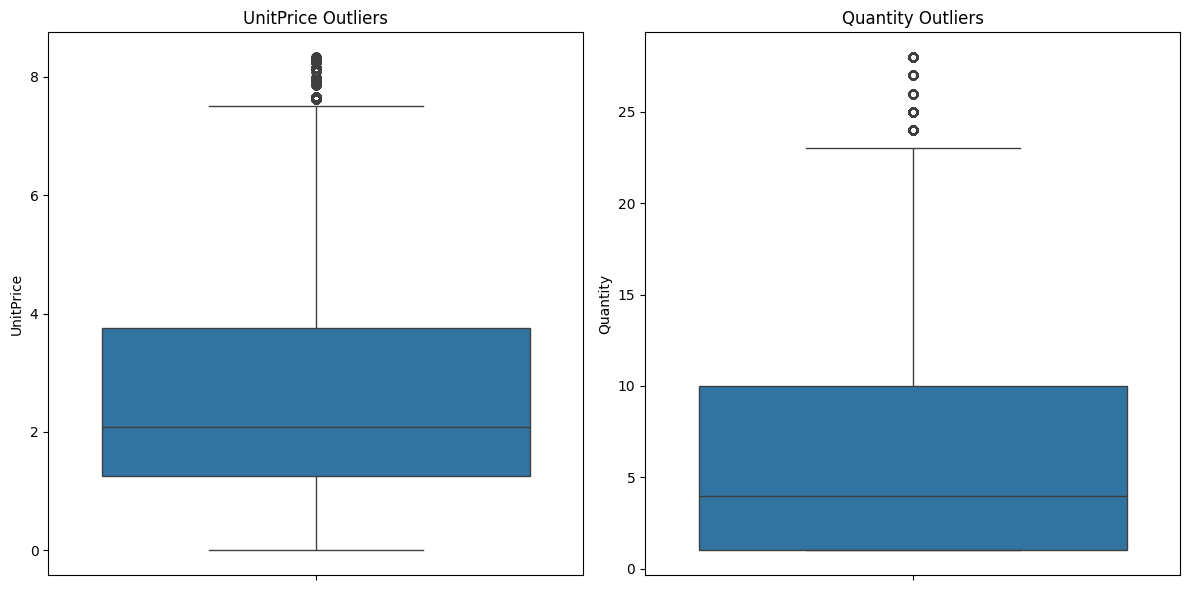

Statistical Summary:
           UnitPrice       Quantity
count  461035.000000  461035.000000
mean        2.595976       6.191296
std         1.930066       6.415038
min         0.000000       1.000000
25%         1.250000       1.000000
50%         2.080000       4.000000
75%         3.750000      10.000000
max         8.330000      28.000000


In [2]:
# Visualize outliers using our modular function
from visualization import plot_outlier_detection

plot_outlier_detection(viable_orders, ['UnitPrice', 'Quantity'],
                      save_path='../data/processed/images/outliers_notebook.png')

# Statistical summary
df_stats = viable_orders[['UnitPrice', 'Quantity']].describe()
print("Statistical Summary:")
print(df_stats)

# Note: Function available in src/visualization.py

### **Distribution Analysis**

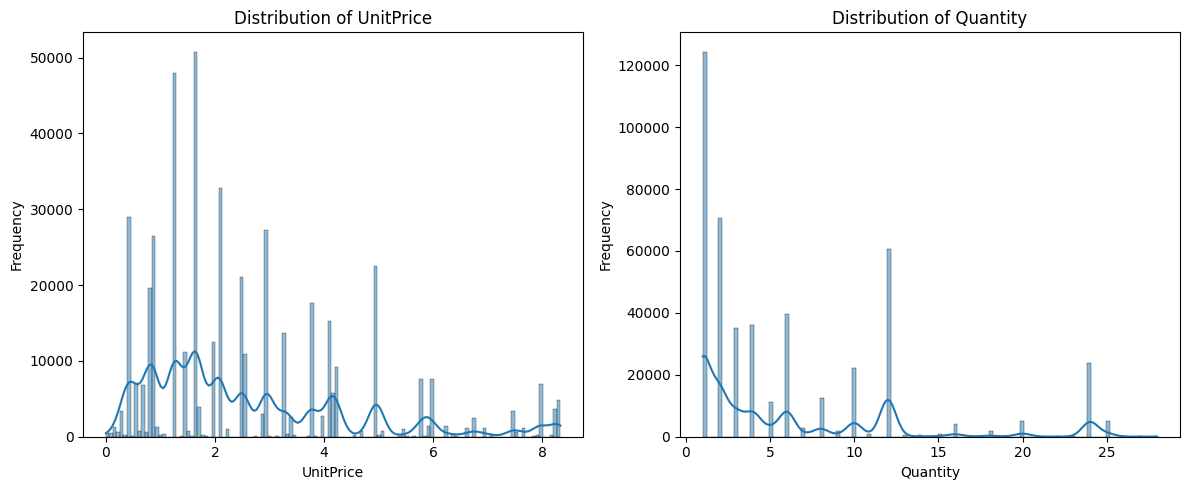

In [3]:
# Plot distributions using our modular function
from visualization import plot_distributions

plot_distributions(viable_orders, ['UnitPrice', 'Quantity'],
                 save_path='../data/processed/images/distributions_notebook.png')

# Note: Function available in src/visualization.py

### **Geographic Analysis**


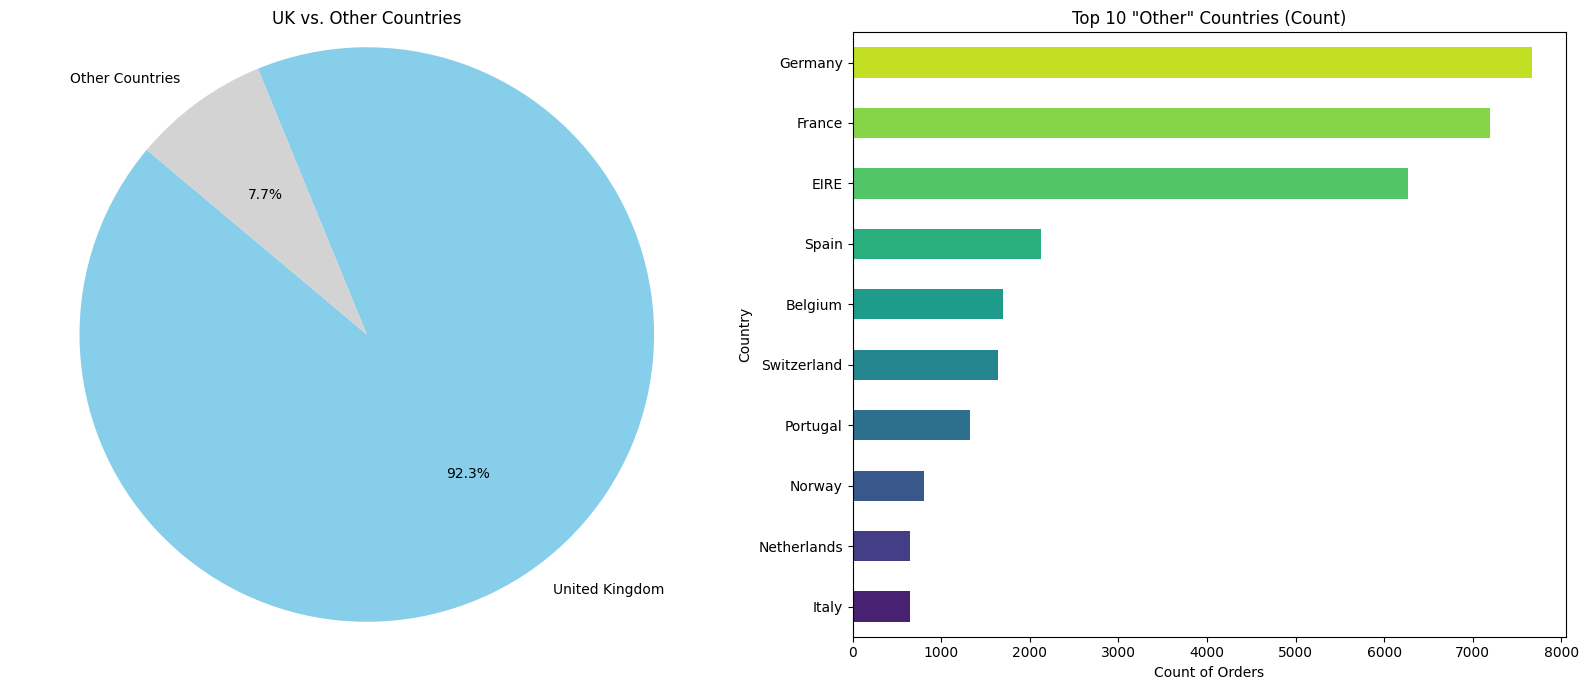

Total countries: 38
Top 5 countries:
Country
United Kingdom    425536
Germany             7669
France              7193
EIRE                6272
Spain               2124
Name: count, dtype: int64


In [4]:
# Plot country distribution using our modular function
from visualization import plot_country_distribution

plot_country_distribution(viable_orders, 
                        save_path='../data/processed/images/country_distribution_notebook.png')

# Country statistics
country_stats = viable_orders['Country'].value_counts()
print(f"Total countries: {len(country_stats)}")
print(f"Top 5 countries:")
print(country_stats.head())

# Note: Function available in src/visualization.py

### **Sales Trend Analysis**

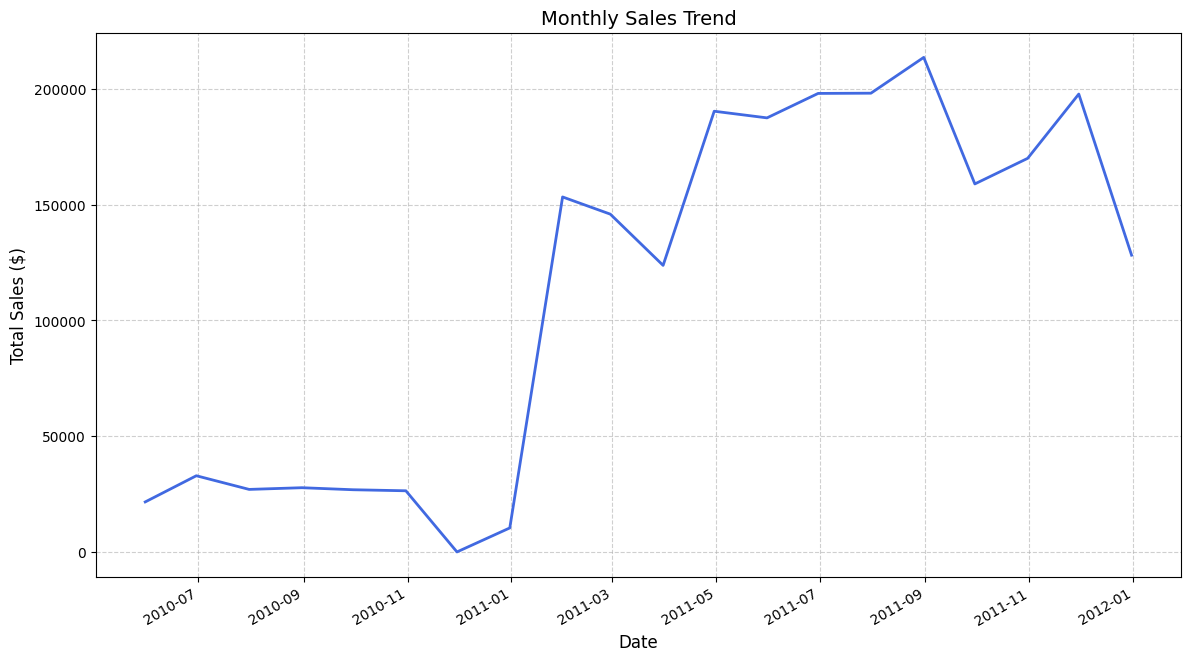

In [5]:
# Prepare data for sales trend analysis
df_sales = viable_orders[['UnitPrice', 'Quantity', 'InvoiceDate']].copy()
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'], errors='coerce').dt.normalize()
df_sales['InvoiceDate'] = df_sales['InvoiceDate'].fillna(pd.Timestamp('2010-01-12'))
df_sales['Sales'] = df_sales['UnitPrice'] * df_sales['Quantity']

# Plot sales trend using our modular function
from visualization import plot_sales_trend

plot_sales_trend(df_sales, start_date='2010-04-01',
                save_path='../data/processed/images/sales_trend_notebook.png')

# Note: Function available in src/visualization.py

### **Customer RFM Analysis**

In [6]:
# Load customer features for RFM analysis
customer_data = pd.read_csv('../data/processed/Customer_RFM_Features.csv')
print(f"Customer data shape: {customer_data.shape}")
customer_data.head()

Customer data shape: (13196, 9)


,CustomerID,Recency,Frequency,Monetary,TotalItems,UniqueProducts,Country,AvgOrderValue,ItemsPerOrder
0,12347.0,96,7,3412.53,1905,97,Iceland,487.504286,272.142857
1,12348.0,221,3,90.20,140,6,Finland,30.066667,46.666667
2,12349.0,698,1,1197.15,547,64,Italy,1197.150000,547.000000
3,12350.0,312,1,294.40,196,16,Norway,294.400000,196.000000
4,12352.0,275,7,1147.44,502,50,Norway,163.920000,71.714286


### **Customer Insights Analysis**

In [7]:
# Find most valuable customers based on different metrics
most_recent_customer = customer_data.loc[customer_data['Recency'].idxmin()]
most_frequent_customer = customer_data.sort_values(by='Frequency', ascending=False).iloc[1]
highest_monetary_customer = customer_data.sort_values(by='Monetary', ascending=False).iloc[1]   
most_variety_customer = customer_data.sort_values(by='UniqueProducts', ascending=False).iloc[1]
most_loyal_customer = customer_data.sort_values(by='AvgOrderValue', ascending=False).iloc[1]

print("=== CUSTOMER INSIGHTS ===")
print(f"Most Recent Customer: {most_recent_customer['CustomerID']} (Recency: {most_recent_customer['Recency']} days)")
print(f"Most Frequent Customer: {most_frequent_customer['CustomerID']} (Frequency: {most_frequent_customer['Frequency']} orders)")
print(f"Highest Monetary Customer: {highest_monetary_customer['CustomerID']} (Monetary: ${highest_monetary_customer['Monetary']:,.2f})")
print(f"Most Variety Customer: {most_variety_customer['CustomerID']} (Unique Products: {most_variety_customer['UniqueProducts']})")
print(f"Most Loyal Customer: {most_loyal_customer['CustomerID']} (Avg Order Value: ${most_loyal_customer['AvgOrderValue']:,.2f})")

=== CUSTOMER INSIGHTS ===
Most Recent Customer: 12381.0 (Recency: 1 days)
Most Frequent Customer: 14911.0 (Frequency: 194 orders)
Highest Monetary Customer: 14096.0 (Monetary: $38,788.42)
Most Variety Customer: 14911.0 (Unique Products: 1595)
Most Loyal Customer: 12378.0 (Avg Order Value: $3,603.94)


### **Country-Based Analysis**

In [8]:
# Average order value by country
country_avg_order = (
    customer_data.groupby('Country')['AvgOrderValue']
    .mean()
    .reset_index()
    .rename(columns={'AvgOrderValue': 'MeanAvgOrderValue'})
)

country_avg_order_sorted = country_avg_order.sort_values(by='MeanAvgOrderValue', ascending=False)
print("=== TOP 5 COUNTRIES BY AVERAGE ORDER VALUE ===")
print(country_avg_order_sorted.head())

=== TOP 5 COUNTRIES BY AVERAGE ORDER VALUE ===
        Country  MeanAvgOrderValue
29    Singapore          1266.7075
20      Lebanon           984.6800
4        Brazil           968.4000
32  Switzerland           910.3279
27          RSA           783.8600


In [9]:
# Total monetary value by country
country_monetary = (
    customer_data.groupby('Country')['Monetary']
    .mean()
    .reset_index()
    .rename(columns={'Monetary': 'MeanMonetaryValue'})
)           

country_monetary_sorted = country_monetary.sort_values(by='MeanMonetaryValue', ascending=False)
print("=== TOP 5 COUNTRIES BY MEAN MONETARY VALUE ===")
print(country_monetary_sorted.head())

=== TOP 5 COUNTRIES BY MEAN MONETARY VALUE ===
        Country  MeanMonetaryValue
29    Singapore        5066.830000
10         EIRE        4841.160833
16      Iceland        3412.530000
23  Netherlands        2646.242857
24       Norway        1936.386000


### **Complete EDA Dashboard**

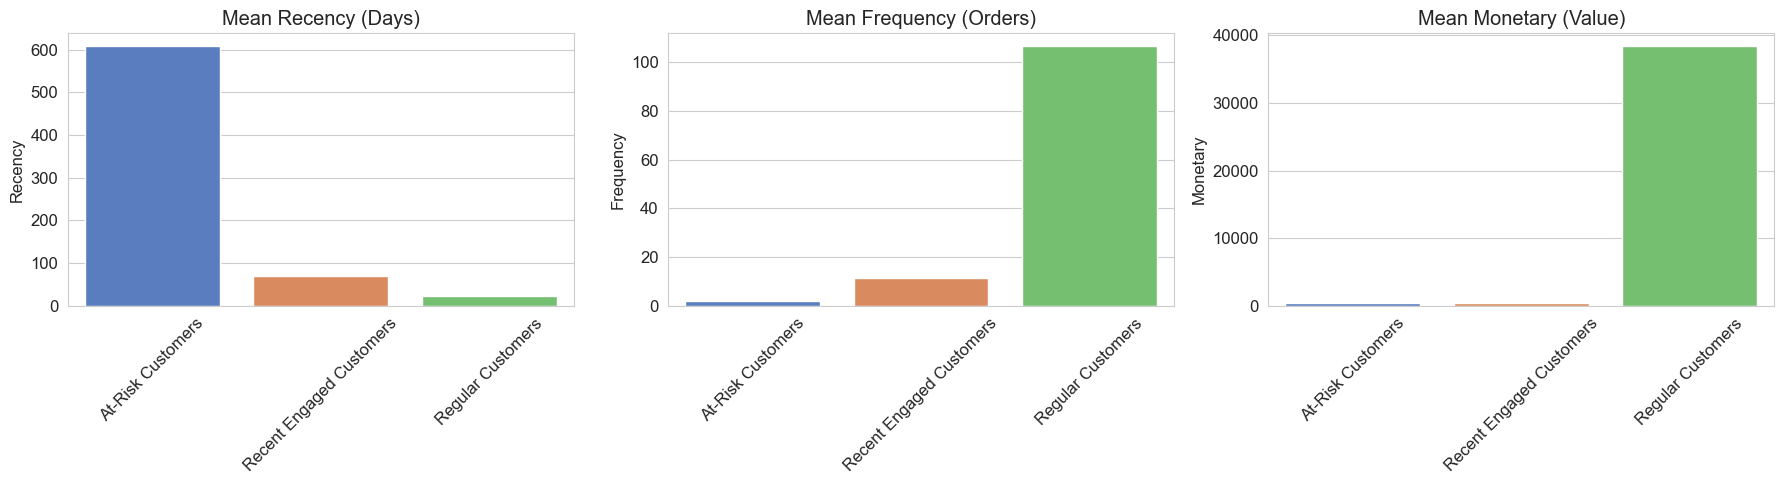

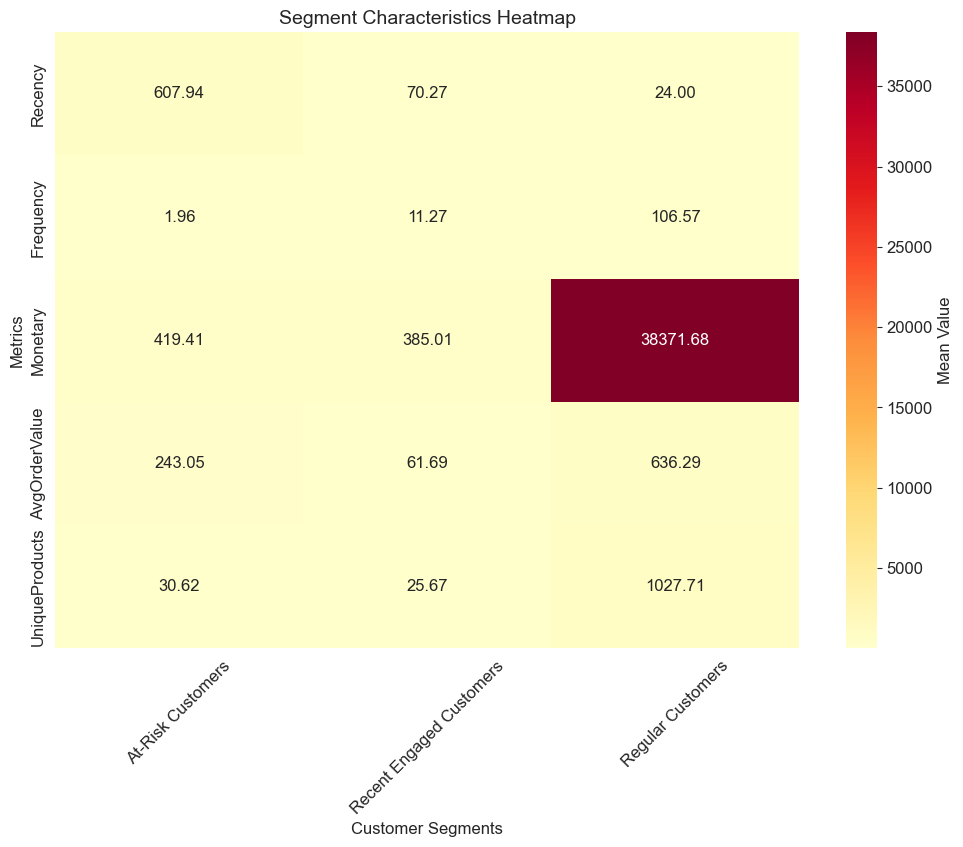

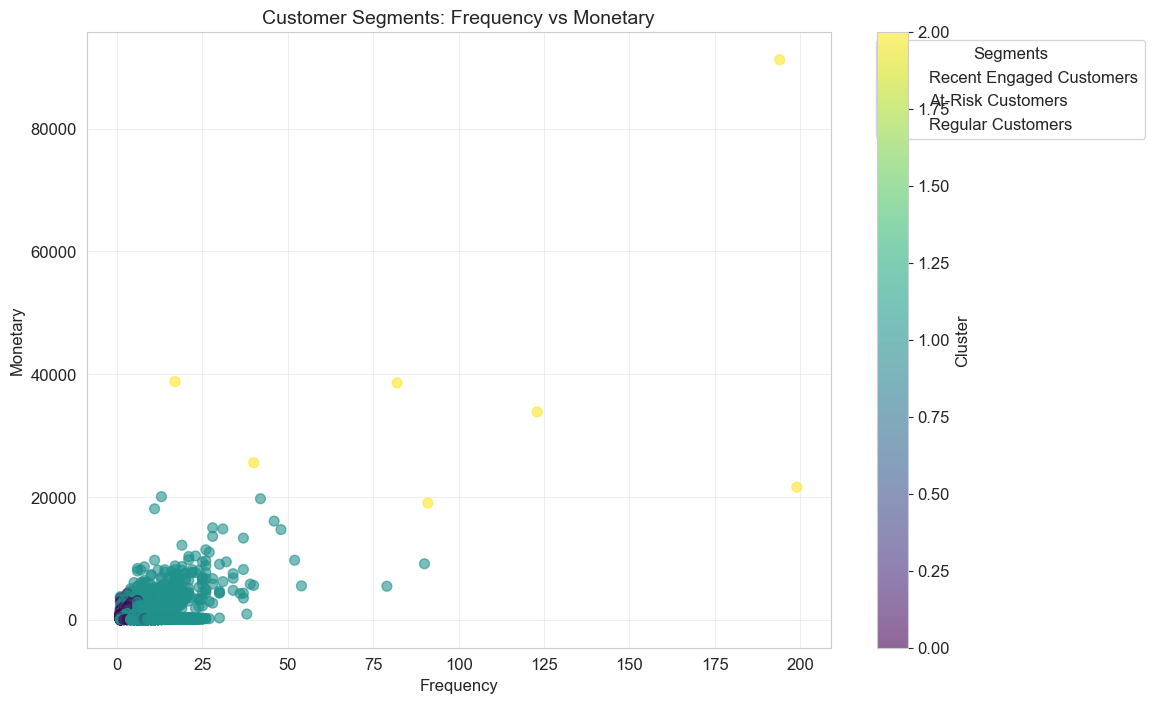

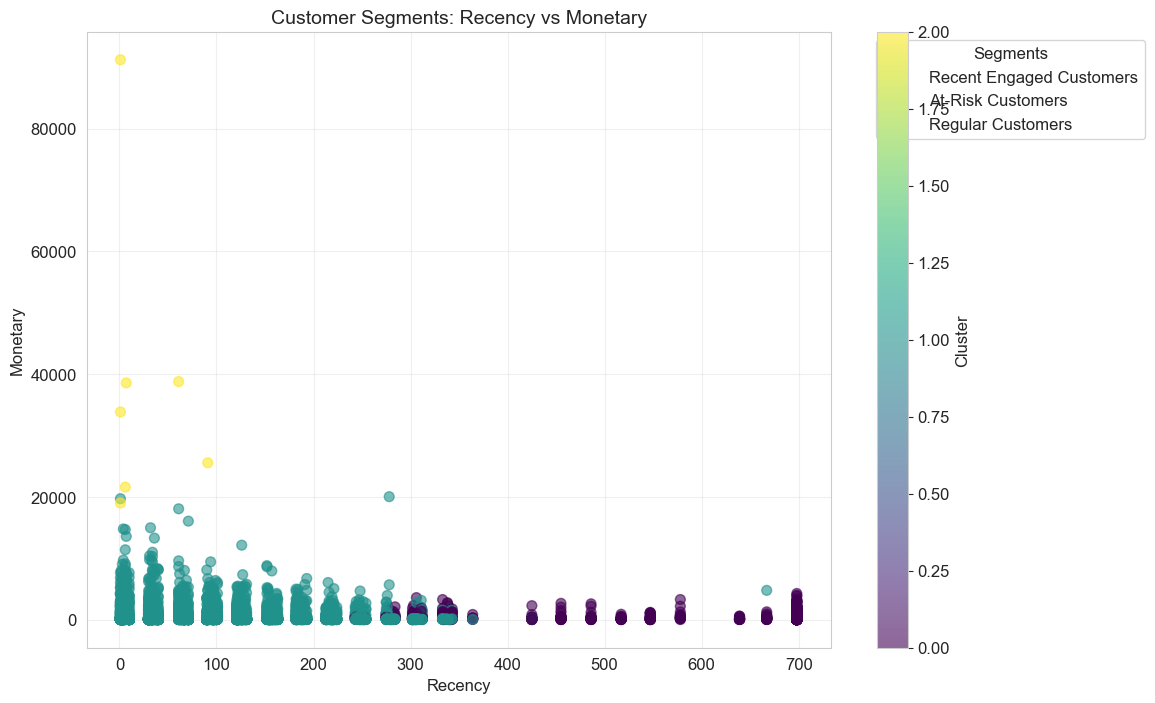

Dashboard plots saved to: ../data/processed/images/
EDA Dashboard created successfully!


In [10]:
# Create comprehensive EDA dashboard using our modular function
from visualization import create_customer_dashboard

# Create output directory if it doesn't exist
os.makedirs('../data/processed/images', exist_ok=True)

# Generate complete dashboard
if os.path.exists('../data/processed/Customer_Segments.csv'):
    customer_segments = pd.read_csv('../data/processed/Customer_Segments.csv')
    create_customer_dashboard(customer_segments, '../data/processed/images/')
    print("EDA Dashboard created successfully!")
else:
    print("Customer segments not available. Run clustering first to generate complete dashboard.")
    
# Note: Function available in src/visualization.py

### **Segment Analysis (if available)**

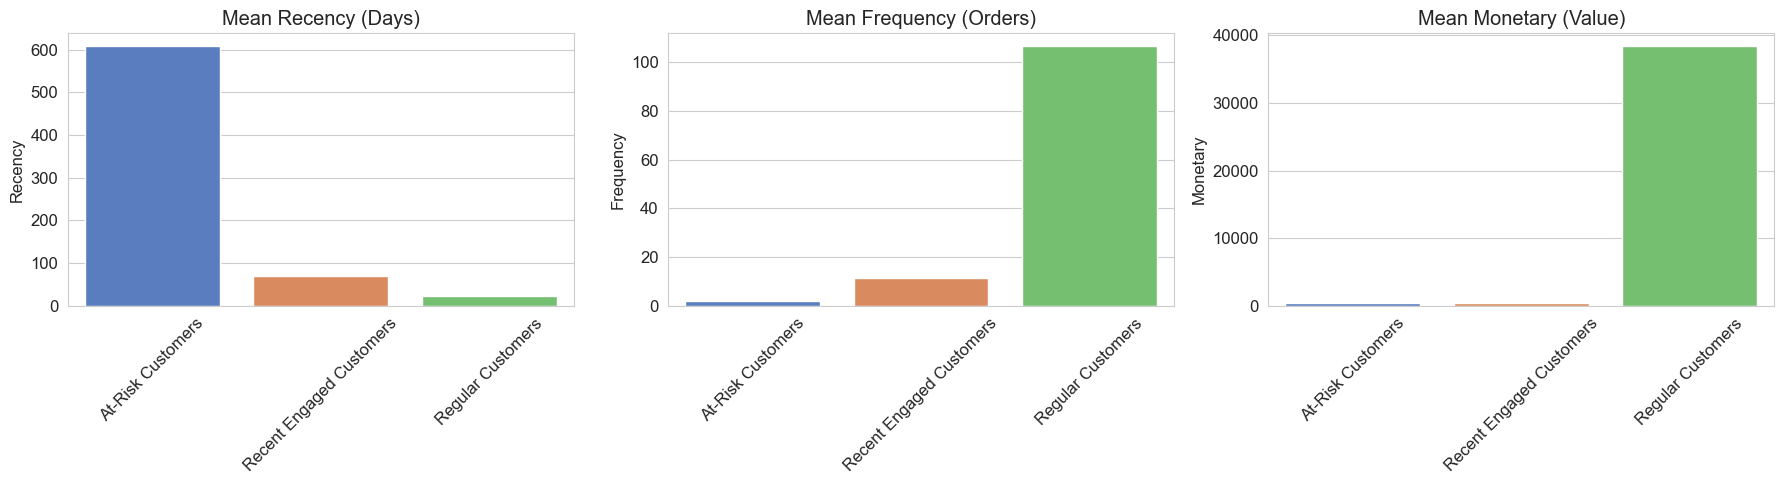

=== SEGMENT DISTRIBUTION ===
Segment
Recent Engaged Customers    11259
At-Risk Customers            1930
Regular Customers               7
Name: count, dtype: int64

Total customers segmented: 13196
Number of segments: 3


In [11]:
# Load customer segments if available
import os
if os.path.exists('../data/processed/Customer_Segments.csv'):
    customer_segments = pd.read_csv('../data/processed/Customer_Segments.csv')
    
    # Visualize RFM segments using our modular function
    from visualization import plot_rfm_segments
    
    plot_rfm_segments(customer_segments, 
                    save_path='../data/processed/images/rfm_segments_eda_notebook.png')
    
    # Segment distribution
    print("=== SEGMENT DISTRIBUTION ===")
    segment_dist = customer_segments['Segment'].value_counts()
    print(segment_dist)
    
    print(f"\nTotal customers segmented: {len(customer_segments)}")
    print(f"Number of segments: {customer_segments['Segment'].nunique()}")
else:
    print("Customer segments not found. Run modeling notebook first.")